参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

**导入基础包**

In [1]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [2]:
df = pd.read_csv('data_features_Order.csv') 

In [3]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Unclassified,Burkholderiales,...,Syntrophorhabdales,Bradymonadales,Solibacterales,Methylacidiphilales,UASB-TL25,Calditrichales,Reyranellales,Dongiales,Chthonomonadales,Candidatus Yanofskybacteria
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,8.265625,23.570312,...,0.000000,0.042969,0.027344,0.136719,0.058594,0.0,0.109375,0.046875,0.0,0.0
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,8.484375,18.730469,...,0.007812,0.054688,0.054688,0.152344,0.019531,0.0,0.093750,0.093750,0.0,0.0
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,8.308594,19.378906,...,0.000000,0.023438,0.031250,0.132812,0.015625,0.0,0.070312,0.058594,0.0,0.0
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,8.394531,22.824219,...,0.003906,0.035156,0.054688,0.179688,0.035156,0.0,0.109375,0.093750,0.0,0.0
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,8.585938,18.863281,...,0.000000,0.023438,0.039062,0.105469,0.011719,0.0,0.070312,0.082031,0.0,0.0


In [4]:
df.shape

(1186, 179)

In [5]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Unclassified', 'Burkholderiales',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=179)

In [6]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = df.columns.to_numpy()
targets = targets[8:]

**简单的EDA**

In [7]:
df.isnull().sum()

Unnamed: 0                       0
Sample ID                        0
Sampling month average         132
Sampling month                  23
SRTd                           342
                              ... 
Calditrichales                   0
Reyranellales                    0
Dongiales                        0
Chthonomonadales                 0
Candidatus Yanofskybacteria      0
Length: 179, dtype: int64

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [10]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [11]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [12]:
df.isnull().sum()

Unnamed: 0                     0
Sample ID                      0
Sampling month average         0
Sampling month                 0
SRTd                           0
                              ..
Calditrichales                 0
Reyranellales                  0
Dongiales                      0
Chthonomonadales               0
Candidatus Yanofskybacteria    0
Length: 179, dtype: int64

重定义训练和测试集

In [13]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**建模**

In [14]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型
from sklearn.linear_model import SGDRegressor
# XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [16]:
rfr =  RandomForestRegressor(n_estimators=100, max_depth=50, random_state=2)

In [17]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', rfr)
])

训练模型

In [18]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8024


利用训练好的模型做测试

In [19]:
y_preds = model.predict(X_test)

In [20]:
y_preds

array([[5.55372660e+00, 2.37736636e+01, 2.12909610e+01, ...,
        1.05004245e-02, 3.72023810e-06, 7.55955958e-04],
       [6.07257732e+00, 2.40997751e+01, 1.98007458e+01, ...,
        1.75143325e-01, 1.91756502e-03, 3.51853924e-03],
       [6.07257732e+00, 2.40997751e+01, 1.98007458e+01, ...,
        1.75143325e-01, 1.91756502e-03, 3.51853924e-03],
       ...,
       [3.68345385e+00, 3.10369741e+01, 1.59040994e+01, ...,
        1.36733197e-01, 5.80821534e-04, 3.80032112e-04],
       [3.68345385e+00, 3.10369741e+01, 1.59040994e+01, ...,
        1.36733197e-01, 5.80821534e-04, 3.80032112e-04],
       [3.68345385e+00, 3.10369741e+01, 1.59040994e+01, ...,
        1.36733197e-01, 5.80821534e-04, 3.80032112e-04]])

**结果可视化**

展示第一个ID的预测结果。

In [21]:
y_preds[0]

array([5.55372660e+00, 2.37736636e+01, 2.12909610e+01, 1.10332869e+00,
       5.90676950e-01, 4.36424317e-01, 3.03724935e-01, 6.63769582e+00,
       2.92673156e-01, 1.39345863e+00, 1.99115445e+00, 1.09701165e-01,
       7.96071925e-01, 2.92345314e-01, 1.57186489e+00, 4.45490635e-01,
       1.26322790e+00, 2.05600904e-01, 4.90559848e-01, 1.13113852e+00,
       3.98717717e-01, 6.46265456e-01, 7.46024006e-01, 1.04287016e+00,
       3.99584209e+00, 3.68773775e-01, 1.88535216e-02, 6.00827300e-02,
       1.41672233e-01, 3.86563196e-01, 1.49134138e-02, 7.21223759e-01,
       5.13141097e-02, 3.71492545e-01, 9.19579243e-02, 1.73579930e-01,
       3.56274468e-02, 4.07356377e-02, 2.03142838e-02, 2.13609144e-02,
       2.14535996e+00, 7.91928872e-03, 2.96953447e-02, 7.87327536e-01,
       2.23839031e-01, 1.49675583e-01, 6.07136657e-02, 1.00411908e-01,
       1.81409565e-02, 2.21029612e-02, 1.53716357e+00, 1.29267242e-01,
       4.03991786e-01, 3.57488049e-01, 1.36928929e-01, 1.47708778e-01,
      

In [22]:
y_test.iloc[0].tolist()

[8.75,
 21.375,
 8.75,
 1.48828125,
 0.84375,
 0.76953125,
 0.3984375,
 3.765625,
 0.36328125,
 1.3671875,
 2.640625,
 0.1171875,
 1.76953125,
 0.48046875,
 1.84375,
 0.3125,
 2.06640625,
 0.0625,
 0.34375,
 0.86328125,
 0.33984375,
 1.0546875,
 1.0390625,
 1.08984375,
 9.6953125,
 0.41015625,
 0.0078125,
 0.0625,
 0.07421875,
 0.28125,
 0.04296875,
 0.609375,
 0.02734375,
 0.58203125,
 0.1875,
 0.15234375,
 0.09765625,
 0.03125,
 0.0234375,
 0.0078125,
 1.6210937500000002,
 0.0078125,
 0.046875,
 1.03125,
 0.19921875,
 0.234375,
 0.078125,
 0.28125,
 0.0234375,
 0.0390625,
 2.94921875,
 0.2109375,
 0.14453125,
 0.4140625,
 0.26171875,
 0.1015625,
 0.4414062499999999,
 0.4921875,
 0.63671875,
 0.30859375,
 0.17578125,
 0.27734375,
 0.01953125,
 0.02734375,
 1.0234375,
 0.0390625,
 1.12890625,
 0.00390625,
 0.08984375,
 0.50390625,
 0.0703125,
 0.0234375,
 0.02734375,
 0.33984375,
 0.05078125,
 0.25,
 1.4453125,
 0.00390625,
 0.6171875,
 0.33203125,
 0.33203125,
 0.83984375,
 0.41796875

In [23]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [24]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Unclassified,5.553727,8.750000
Burkholderiales,23.773664,21.375000
Chitinophagales,21.290961,8.750000
Others,1.103329,1.488281
Rickettsiales,0.590677,0.843750
...,...,...
Calditrichales,0.000024,0.000000
Reyranellales,0.122490,0.125000
Dongiales,0.010500,0.031250


预测和实际结果的柱状图对比

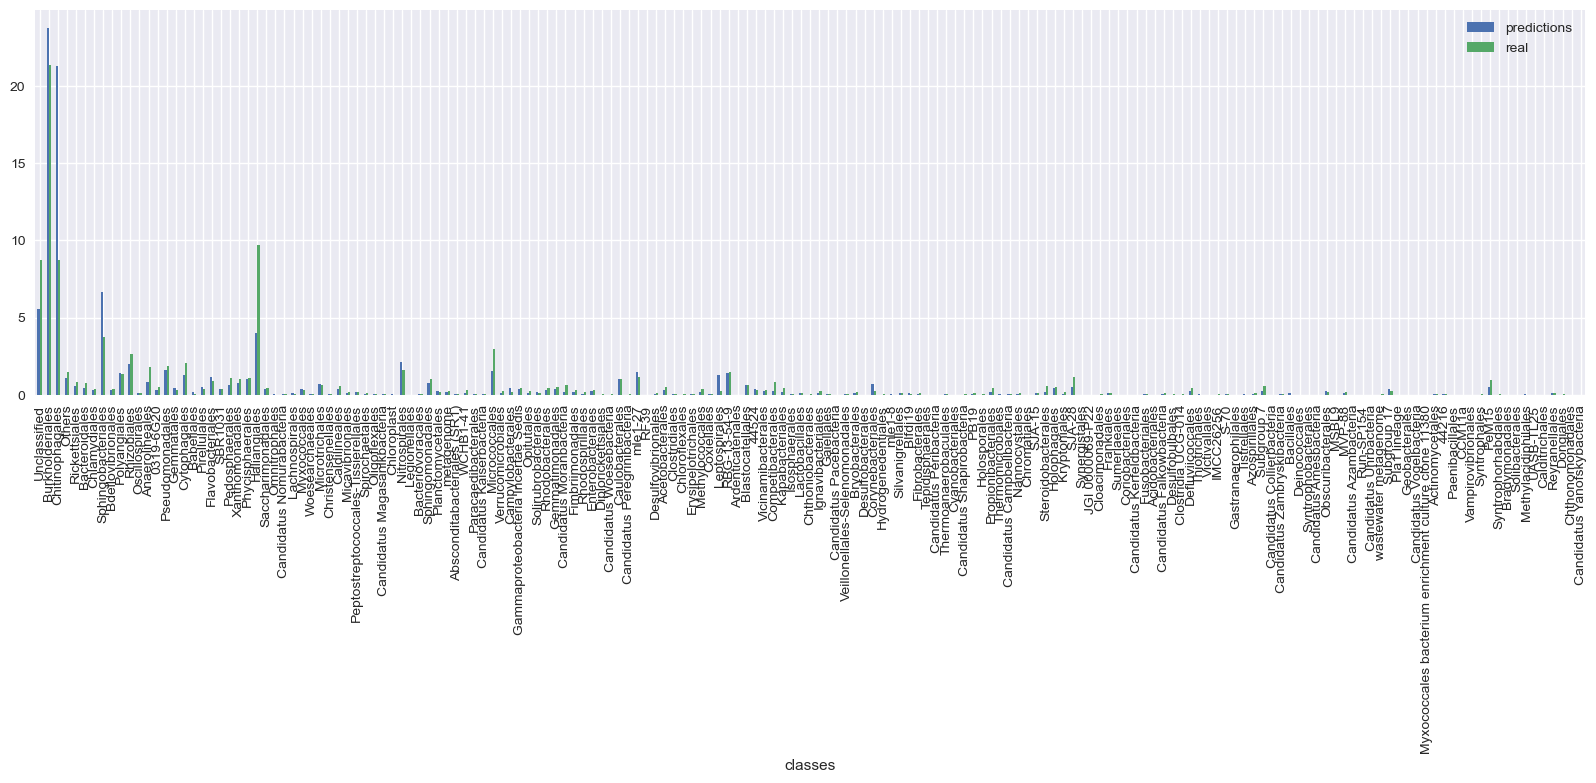

In [25]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

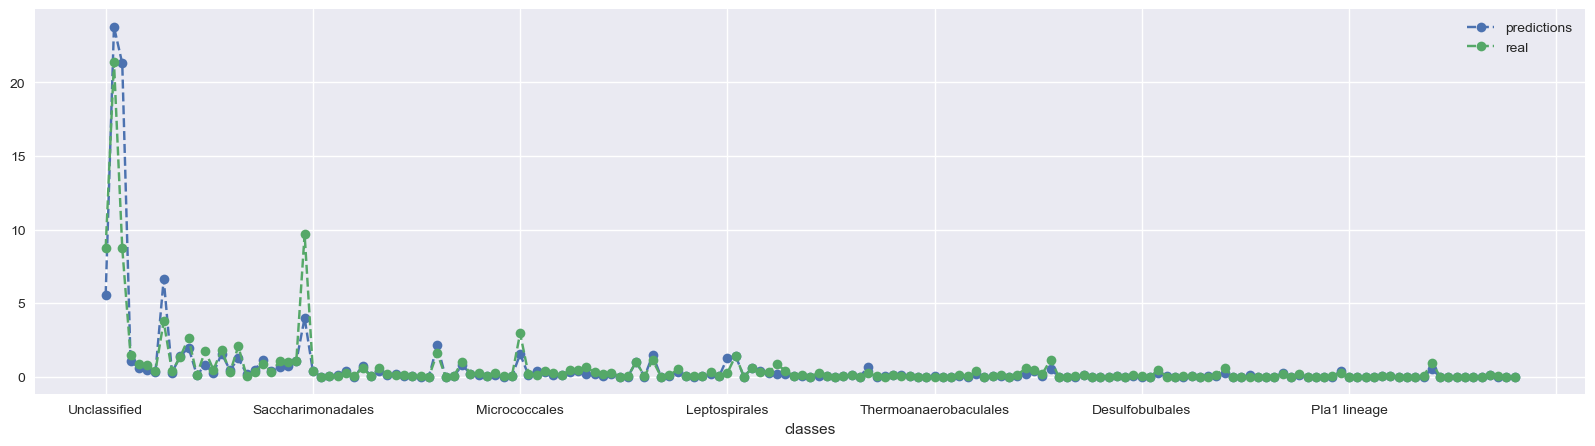

In [26]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [27]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8024


In [28]:
from sklearn import metrics

训练集的MSE

In [29]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.2442113015341178

测试集部分

In [30]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

3.1254774720609326

In [31]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

1.767901997301019

In [32]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

0.4012926950748977

In [33]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

75586438229945.0

# 调参和优化

In [34]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [35]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [36]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', RandomForestRegressor(max_depth=50, random_state=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': RandomForestRegressor(max_depth=50, random_state=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__bootstrap': True,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': 50,
 'regressor__max_features': 'auto',
 'regressor__max_leaf_nodes': None,
 'regressor__max_samples': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 100,
 'regressor__n_jobs': None,
 'regressor__oob_score': False,
 'regressor__random_state': 2,
 'regressor__verbose': 0,
 'regressor__warm_start': False}

In [37]:
# Perform Gridsearch and fit
param_grid = {"regressor__max_depth": [10,50,100,150,200,300,400],
             "regressor__n_estimators": [10,50,100,150,200,300,400]}

In [38]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        RandomForestRegressor(max_depth=50,
                                                              random_state=2))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 50, 100, 150, 200, 300,
                                                  400],
                         'regressor__n_estimators': [10, 50, 100, 150, 200, 300,
                                                     400]},
             verbose=1)

In [39]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       random_state=2))])

In [40]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.6103


调参后R方有变得更小。

In [41]:
y_preds1 = gs.predict(X_test)

In [42]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

3.006847338764033

MSE的结果还行

In [43]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.45935025369394683

训练接的MSE也比较小。